# Bias Variance Tradeoff + More Overfitting

When modelling, we are trying to create a useful prediction that can help us in the future. When doing this, we have seen how we need to create a train test split in order to keep ourselves honest in tuning our model to the data itself. Another perspective on this problem of overfitting versus underfitting is the bias variance tradeoff. We can decompose the mean squared error of our models in terms of bias and variance to further investigate.

$ E[(y-\hat{f}(x)^2] = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$
  
  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

<img src="./images/bias_variance.png" alt="Drawing" style="width: 500px;"/>

## 1. Split the data into a test and train set.

In [2]:
import pandas as pd
df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
def norm(col):
    minimum = col.min()
    maximum = col.max()
    return (col-minimum)/(maximum-minimum)
for col in df:
    try:
        df[col] = norm(df[col])
    except:
        pass
X = df[['budget','imdbRating','Metascore','imdbVotes']]
y = df['domgross']
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0.034169,0.055325,21 &amp; Over,NaN,0.997516,0.839506,0.500000,0.384192,0.261351
1,0.182956,0.023779,Dredd 3D,NaN,0.999503,0.000000,0.000000,0.000000,0.070486
2,0.066059,0.125847,12 Years a Slave,NaN,1.000000,1.000000,1.000000,1.000000,0.704489
3,0.252847,0.183719,2 Guns,NaN,1.000000,0.827160,0.572917,0.323196,0.371052
4,0.157175,0.233625,42,NaN,1.000000,0.925926,0.645833,0.137984,0.231656


In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y)

## 2. Fit a regression model to the training data.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Model vs Data for Test Set')

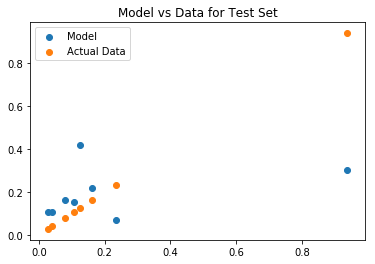

In [9]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
plt.scatter(y_test, linreg.predict(X_test), label='Model')
plt.scatter(y_test, y_test, label='Actual Data')
plt.legend()
plt.title('Model vs Data for Test Set')

## 2b. Plot the training predictions against the actual data. (Y_hat_train vs Y_train)

In [25]:
#Your code here

## 2c. Plot the test predictions against the actual data. (Y_hat_test vs Y_train)

Text(0.5, 1.0, 'Model vs Data for Test Set')

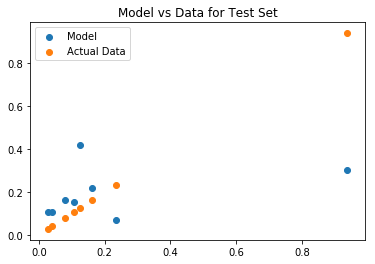

In [10]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
plt.scatter(y_test, linreg.predict(X_test), label='Model')
plt.scatter(y_test, y_test, label='Actual Data')
plt.legend()
plt.title('Model vs Data for Test Set')

## 3. Calculating Bias
Write a formula to calculate the bias of a models predictions given the actual data.   
(The expected value can simply be taken as the mean or average value.)  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  

In [28]:
def bias():
    pass

## 4. Calculating Variance
Write a formula to calculate the variance of a model's predictions (or any set of data).  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [29]:
def variance():
    pass

## 5. Us your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [31]:
#Train Set
b = None#Your code here
v = None#Your code here
#print('Bias: {} \nVariance: {}'.format(b,v))

In [32]:
#Test Set
b = None#Your code here
v = None#Your code here
#print('Bias: {} \nVariance: {}'.format(b,v))

## 6. Describe in words what these numbers can tell you.

#Your description here (this cell is formatted using markdown)

## 7. Overfit a new model by creating additional features by raising current features to various powers.

In [33]:
#Your Code here

## 8a. Plot your overfitted model's training predictions against the actual data.

In [34]:
#Your code here

## 8b. Calculate the bias and variance for the train set.

In [35]:
#Your code here

## 9a. Plot your overfitted model's test predictions against the actual data.

In [36]:
#Your code here

## 9b. Calculate the bias and variance for the train set.

In [37]:
#Your code here

## 10. Describe what you notice about the bias and variance statistics for your overfit model.

#Your description here (this cell is formatted using markdown)